In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [13]:
#Ruta de acceso para cualquier archivo
dataMatriz = '/content/drive/My Drive/PROJECT/DATA_OFFCORSS/MATRIZ DE INFORMACIÓN CAMPAÑA 7.xlsx' 
dataCampania= '/content/drive/My Drive/PROJECT/DATA_OFFCORSS/DATA CIERRE CAMPAÑA 7  - VENTA POR CATALOGO.xlsx'


In [11]:
import pandas as pd

In [14]:
dMatriz = pd.read_excel(dataMatriz, sheet_name='matriz')

In [15]:
 dCampania = pd.read_excel(dataCampania)

In [16]:
dMatriz.columns

Index(['CONCA', 'GÉNERO', 'MUNDO', 'CLASIFICACIÓN', 'ESTRATEGIA',
       'NOMBRE COLECCIÓN', 'TIPO DE VENTA', '# PÁGINA', 'COTTON', 'MATERIAL',
       'DESCRIPCIÓN', 'DESCRIPCIÓN COMERCIAL', 'COMPOSICIÓN', 'COLOR GALLERY',
       'TALLA', 'COLOR COMERCIAL', 'LÍNEA DE GRABACIÓN', 'PLU', '$$ REGULAR',
       '$$ CATALOGO', 'AHORRO', 'PRECIO FACTURA', 'PRECIO FACTURA SIN IVA',
       'COSTO REAL', 'MARGEN REAL', 'CAMPAÑA', 'TIPO DE PRENDA', 'MES MODA',
       '%DESC. COMERCIAL', '%DESC. ASCESORA', 'VALOR MATRIZ', 'Grupo articulo',
       'EXHIBICIÓN', 'EXPOSICIÓN', 'NUM_ APARICIONES', 'PORTADA',
       'ZOOM_PRODUCTO', 'PESO_ EXHIBICIÓN', 'ESTAMPADO P.SUPERIORES',
       'ESTAMPADO P.INFERIORES', 'OCURRENCIA'],
      dtype='object')

In [17]:
dCampania.columns

Index(['AÑO', 'CAMPAÑA', 'REGION', 'DESCRIPICION_ZONA', 'NUMERO_ZONA',
       'CLASIFICACION', 'ESTRATEGIA', 'GRUPO_ARTICULO', 'TIPO PRENDA',
       'NUMERO_PEDIDO', 'REFERENCIA', 'COLOR_COMERCIAL', 'CODIGO_COLOR',
       'TALLA', 'SKU_PLU', 'PRECIO_CATALOGO', 'COSTO', 'DDA UND', 'FAC UND',
       'DDA $$', 'FAC $$', 'MARGEN', 'NIVEL_SERVICIO', 'NUMERO_DE_PEDIDOS',
       'NPU_D', 'UPE_D', 'ORDEN_PROMEDIO'],
      dtype='object')

**Project Summary**: For this project, our goal is to generate demand predictions for a specific sales channel of the client. As we mentioned in the Project Scoping, there is a specific sales channel on which will focus our attention, that is direct sales, which are completed through sales-persons face-to-face with clients via a physical catalog. Such catalog is launched 12 times in a year and it contains multiple collections from which clients can choose from. We will be focusing on a single campaign: "Moda". This campaign changes for every catalog, hence the challenge of making accurate and asertive prediction on the demand.

Each sales-person places the order to Off-Corss without having true ground knowledge of the avilability of inventory, therefore, the demand on these orders is not always met, and our client and the sales people incur in significant lossess. In order to minimze these losses our client's planning team uses an ad-hoc procedure based on prior catalog sales to estimate the number of units that should be put into production.

**Data**: Out client has provided us two tables extracted at the end of a single catalog, i.e., one of the twelve that produces in the year. The first table **Campaña** has information such as the region of the order, date, specific reference features (color, size, price, collection), demand (how many units were ordered), among other. The second table **Matriz** hold information on how the specifi item was displayed in the catalog so we can find variables like page number, location on page, if the item has prints on it, the zoom on the item, and other information which is not entirely structure or correlated with our client's current forecasting approach. 


## Campaign Data

Let's start with looking at what type of variables are we dealing with in this table.

In [32]:
dCampania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162793 entries, 0 to 162792
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AÑO                162793 non-null  int64  
 1   CAMPAÑA            162793 non-null  int64  
 2   REGION             162793 non-null  object 
 3   DESCRIPICION_ZONA  162793 non-null  object 
 4   NUMERO_ZONA        162793 non-null  int64  
 5   CLASIFICACION      162793 non-null  object 
 6   ESTRATEGIA         162793 non-null  object 
 7   GRUPO_ARTICULO     162793 non-null  object 
 8   TIPO PRENDA        162793 non-null  object 
 9   NUMERO_PEDIDO      162793 non-null  int64  
 10  REFERENCIA         162793 non-null  int64  
 11  COLOR_COMERCIAL    162793 non-null  object 
 12  CODIGO_COLOR       162793 non-null  object 
 13  TALLA              162793 non-null  object 
 14  SKU_PLU            162793 non-null  int64  
 15  PRECIO_CATALOGO    162793 non-null  float64
 16  CO

The total number of orders for this single campaign is:

In [34]:
len(dCampania)

162793

Which correspond to a set of 2925 references:

In [35]:
len(dCampania.SKU_PLU.unique())

2925

These references are grouped by "CLASIFICACION" or collections. Let's see how many refernces are associated with each collection:

In [59]:
dCampania.groupby('CLASIFICACION').agg({'SKU_PLU':'nunique'}).sort_values('SKU_PLU', ascending=False)

,SKU_PLU
CLASIFICACION,
Moda,991
Virtual,565
Básicos,529
Categorías,480
Líneas,309
Saldos,65


As mentioned, the "Moda" Collection is the one with most references in this sales catalog, we expect to see a similar behavior for other catalogs as well. It is why we are focusing our efforts in improving the forecasting of demand of this specific Classification.

Are the most sales/orders also associated with this collection? What percentage of total sales correspond to each Classification?



In [60]:
dCampania.CLASIFICACION.value_counts()/len(dCampania)*100

Moda          37.349886
Básicos       15.704606
Virtual       14.106258
Categorías    14.015345
Líneas        11.965502
Saldos         6.858403
Name: CLASIFICACION, dtype: float64

Yes! Over 30% of the sales of this catalog were predominantly made or "Moda" items, followed by Básicos, and since it's 2020, Tapabocas.

These classification is further broken down into Strategy (Estrategia), let's see which Estrategia and how many references bewlong to each:


In [61]:
dCampania.groupby(['CLASIFICACION', 'ESTRATEGIA']).agg({'SKU_PLU':'nunique'})

SKU_PLU
CLASIFICACION ESTRATEGIA                   
Básicos       Básicos                   529
Categorías    Calzado                   396
              Cuidado personal           32
              Hogar                       8
              Ingeribles                  2
              Juguetería                  3
              Pets                       22
              Snacks saludables           4
              Vhera lucci                13
Líneas        ABC                        63
              Interior                  121
              Pijamas                   125
Moda          Moda                      991
Saldos        Evacuación Básicos         20
              Evacuación Oc Sport        15
              Evacuación Playa            8
              Evacuación moda            22
Virtual       Básicos                    24
              ESPRIT                     53
              Evacuación Básicos         26
              Evacuación Pijamas         12
              Evacuación Tapabocas        6
              Hogar                       1
              Interior                   13
              Juguetería                 13
              Moda                       41
              Protección                147
              Special Ocassions         137
              Tapabocas                  62
              VELEZ                      30

How are then these references grouped by type of product, is it more pants, jackets, shirts?

In [75]:
dCampania.groupby(['GRUPO_ARTICULO']).agg({'SKU_PLU':'nunique'}).sort_values('SKU_PLU', ascending=False)

,SKU_PLU
GRUPO_ARTICULO,
CAMISETA,641
CALZADO,396
PANTALON CORTO,230
PANTALON LARGO,214
CONJUNTO,211
BUZO O CHAQUETA,175
CAMISA,166
PIJAMA,162
DENIM,105


How are the orders grouped by the type of article? What proportion of sales does each type covers?

In [76]:
dCampania.GRUPO_ARTICULO.value_counts()/len(dCampania)*100

CAMISETA             25.005375
CONJUNTO             13.796662
TAPABOCAS             9.230127
Cuidado personal      6.336882
PANTALON CORTO        6.029743
PANTALON LARGO        5.884774
CALZADO               4.885345
PIJAMA                4.354610
BODY                  4.088014
VESTIDO               3.579392
CAMISA                2.000700
Juguetería            1.818260
DENIM                 1.804132
SET                   1.562721
Hogar                 1.498222
FALDA                 1.374752
BUZO O CHAQUETA       1.296125
OVERALL               1.269096
PANTY                 0.762318
MEDIAS                0.695976
ENTERIZO EXTERIOR     0.418323
TOP                   0.367338
CORBATA               0.351366
PAÑOLETA              0.347681
PANTALONCILLO         0.337852
ROPA DE BAÑO          0.262911
MISCELÁNEOS           0.181212
CUELLO                0.172612
SOMBRERO              0.137598
CAPUCHA               0.068799
Toalla                0.035628
CARGADERA             0.025800
CORREA  

As we can see from this table, around 50% of sales is concentrated around only 5 products. This item group can be further broken down into more categories. Let's see the top 20 item types sorted by number of references:


In [78]:
dCampania.groupby(['GRUPO_ARTICULO', 'TIPO PRENDA']).agg({'SKU_PLU':'nunique'}).sort_values('SKU_PLU', ascending=False)[:20]

SKU_PLU
GRUPO_ARTICULO  TIPO PRENDA                  
CAMISETA        CAMISETA MANGA CORTA      317
                CAMISETA MANGA SISA       177
CALZADO         TENIS                     176
PANTALON CORTO  BERMUDA                   113
CAMISETA        CAMISETA                  109
DENIM           DENIM                     105
PANTALON LARGO  SUDADERA                  103
PANTALON CORTO  SHORT                      89
CALZADO         BOTAS                      87
CONJUNTO        CONJUNTO LARGO             85
CALZADO         SANDALIA                   83
CONJUNTO        CONJUNTO CORTO             79
BODY            BODY MANGA CORTA           73
CAMISA          CAMISA MANGA CORTA         63
BUZO O CHAQUETA CHAQUETA                   62
PANTALON LARGO  PANTALON                   54
CAMISA          CAMISA MANGA LARGA         53
BUZO O CHAQUETA BUZO                       50
                BUZO O CHAQUETA            50
FALDA           MINIFALDA                  50

This breakdown may be too specific for our purposes, but it is important to know since when looking at the non-structured information pulled from the catalog, it'll be useful to map and identify if this leel of granularity will help explain some of the variance.

Another important factor that will play out into our modelling is that of location of the sales. In fact, we know from the client that items will be demanded differently by the different regions of the country. Let's see the distribution of orders by region:

In [79]:
dCampania['REGION'].value_counts()/len(dCampania)

ORIENTE        0.278777
SUR            0.223161
OCCIDENTE      0.189750
NORTE          0.173576
TELEFONICAS    0.134736
Name: REGION, dtype: float64

The orders are pretty much evenly distributed. We also notice that among regions phone sales are included. This is an interesing fact about regional sales, since we will not be able to relate these orders to a specific climate, hence our predicitons will be limited when merging with geolocated data.

Is there a more informative detailed way of locating these sales within each region?

In [103]:
region = dCampania.REGION.unique()
locations = {r: list(dCampania[dCampania.REGION == r].DESCRIPICION_ZONA.unique()) for r in region}
locations

{'NORTE': ['BARRANQUILLA 2',
  'BARRANQUILLA 4',
  'SANTA MARTA NORTE',
  'SANTA MARTA SUR',
  'CARTAGENA 1',
  'CARTAGENA 2',
  'CARTAGENA POBLACIONES',
  'SABANALARGA',
  'FUNDACIÓN',
  'EL CARMEN DE BOLIVAR',
  'MONTERIA NORTE',
  'MONTERIA SUR',
  'MAGANGUE',
  'CERETE',
  'PLANETA RICA',
  'SIN REGISTRO'],
 'OCCIDENTE': ['NIQUIA',
  'BELLO',
  'ARANJUEZ',
  'CAUCASIA',
  'APARTADO',
  'TURBO',
  'LA DORADA',
  'PUERTO BERRIO',
  'ITSMINA',
  'CALI',
  'BUENAVENTURA',
  'PASTO',
  'QUIBDO'],
 'ORIENTE': ['SOGAMOSO',
  'BUCARAMANGA 1',
  'GIRON',
  'CUCUTA 1',
  'CUCUTA 2',
  'AGUAZUL',
  'ARAUCA',
  'COPEY',
  'AGUACHICA',
  'OCAÑA',
  'BARRANCABERMEJA',
  'RIOHACHA   ',
  'VALLEDUPAR 1',
  'VALLEDUPAR 2',
  'MAICAO   '],
 'SUR ': ['ESPINAL',
  'VILLAVICENCIO NORTE',
  'VILLAVICENCIO ORIENTE',
  'GUAVIARE',
  'GARZON',
  'SIN REGISTRO',
  'FLORENCIA',
  'NEIVA 1',
  'GRANADA',
  'PITALITO',
  'MOCOA',
  'IBAGUE',
  'YOPAL',
  'VILLAVICENCIO SUR'],
 'TELEFONICAS': ['TELEFONICA 1',
 

As we see there are a limited number of zones within each region for which we can map each sale. This level may be enough to include climate as a possible factor of sales of specific references.

### Moda Collection

Let's for a moment stop here to look only at the "Moda" Collection, which is initially the one we are more interested in. How are references grouped by type of article within this Collection? How many orders by Item Group were produced?

In [104]:
moda = dCampania[dCampania.CLASIFICACION == "Moda"]
moda.groupby('GRUPO_ARTICULO').agg({'SKU_PLU':'nunique'}).sort_values('SKU_PLU',ascending=False)

,SKU_PLU
GRUPO_ARTICULO,
CAMISETA,281
CONJUNTO,182
PANTALON CORTO,131
PANTALON LARGO,107
DENIM,56
CAMISA,52
BODY,48
FALDA,33
BUZO O CHAQUETA,28


How are the sales of the collection disgributed by item type?

In [105]:
moda.GRUPO_ARTICULO.value_counts()/len(moda)*100

CONJUNTO             35.004852
CAMISETA             28.210779
PANTALON CORTO        7.315429
VESTIDO               4.820486
PANTALON LARGO        4.730030
BODY                  4.308998
DENIM                 3.503117
FALDA                 3.320560
OVERALL               2.514679
CAMISA                2.378172
SET                   1.945628
ENTERIZO EXTERIOR     1.120011
BUZO O CHAQUETA       0.827262
Name: GRUPO_ARTICULO, dtype: float64

### Prices (TO-DO)

### Missing Values

### Numerical Variables

- Distributions by hierarchies

### Response Variable: Demand

Now that we have seen how possible predictors behave and how they are distributed, we'd like to see what potential models we could fit to our observations. Rememeber this is a highly variable and volatile process and the only ground truth measurement we have is the Demand Amount, i.e., how many units of each reference will be ordered.

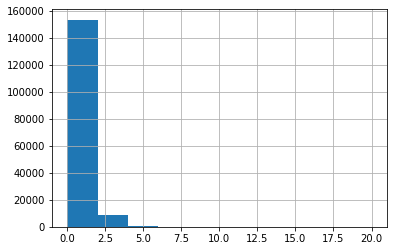

In [110]:
dCampania['DDA UND'].hist()

As we see from the histogram of the units orderd across all references, we see that most sales are only on a single unit. This will be a problem for modeling since it is a highly skewed variable. Some highlights:

- Demand is stricly positive, there shuold not be negative demanded units for any reference
- Demand is an integer values: there is no such thing as partial units

This variable can be considered a count, therefore approriate modeling assumptions will be required.

How deviated were the actual registered sales and the orders? 

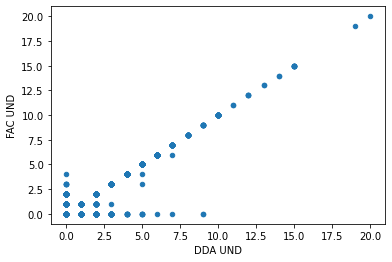

In [116]:
_ = dCampania.plot(x = 'DDA UND', y = 'FAC UND', kind = 'scatter')


We expect to see all sales on the diagonal (45 degree) line where the true sold units and the ordered units were equal. There are some strange values where no units were ordered but there were sales associated with this. We'll have to dig deeper into those data points to understand what may have happened.

### Potential modeling Questions

- Further exploration on relationships between demand and reference features.
- Further exploration on demand by region

## Matriz (Catalog) Data - Unstructured

- Look for overlaps in variables
- look for hierarchies
- How does the "Moda" collection looks form this angle?

